# โปรแกรมลบ Noise

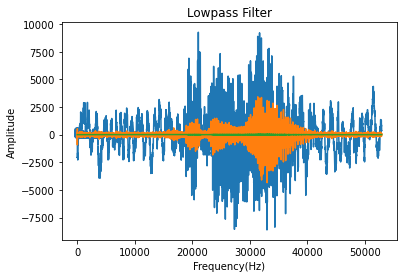

In [30]:
import numpy as np  
import scipy as sp  
from scipy.io.wavfile import read  
from scipy.io.wavfile import write  
from scipy import signal  
import matplotlib.pyplot as plt  
import IPython

get_ipython().magic('matplotlib inline')

(Frequency, array) = read('Noise.wav') 

len(array)  
plt.plot(array)   
plt.title('Original Signal Spectrum')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  

FourierTransformation = sp.fft.ifft(array)  
scale = np.linspace(0, Frequency, len(array))  

plt.stem(scale[0:5000], np.abs(FourierTransformation[0:5000]), use_line_collection = True) 
plt.title('Signal spectrum after FFT')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  

GuassianNoise = np.random.rand(len(FourierTransformation))  
NewSound = GuassianNoise + array  
 
b,a = signal.butter(5, 1000/(Frequency/2), btype='highpass')  

filteredSignal = signal.lfilter(b,a,NewSound)  
plt.plot(filteredSignal)  
plt.title('Highpass Filter')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  

c,d = signal.butter(5, 380/(Frequency/2), btype='lowpass') 
newFilteredSignal = signal.lfilter(c,d,filteredSignal)  
plt.plot(newFilteredSignal) 
plt.title('Lowpass Filter')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  

write("file.wav", Frequency, np.int16(newFilteredSignal/np.max(np.abs(newFilteredSignal)) * 32767))

## ไฟล์ต้นฉบับ

In [31]:
IPython.display.Audio("Noise.wav")

## ไฟล์ลบ Noise

In [32]:
IPython.display.Audio("file1.wav")